cross entropy loss (cse1)　分類問題

In [ ]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更して下さい。

In [ ]:
%cd "ctorch210929/MiniCTorch_Prototype/notebook"

/content/drive/My Drive/Colab Notebooks/ctorch210929/MiniCTorch_Prototype/notebook


ライブラリのimport

In [ ]:
! pip install lark-parser

     |████████████████████████████████| 103 kB 5.4 MB/s 


In [ ]:
import sys
sys.path.append("../")

import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import minictorch.generator as GN
import minictorch.converter as CV

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

#from torch.utils.data import TensorDataset
#from torch.utils.data import DataLoader

データ読み込み

In [ ]:
# データ読み込み
iris = datasets.load_iris()
data   = iris['data']
target = iris['target']

# 学習データと検証データに分割
x_train, x_valid, y_train, y_valid = train_test_split( data, target, shuffle=True )

# 特徴量の標準化
scaler = StandardScaler()
scaler.fit( x_train )

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

# Tensor型に変換
# 学習に入れるときはfloat型 or long型になっている必要があるのここで変換してしまう
x  = torch.from_numpy(x_train).float()
y  = torch.from_numpy(y_train).long()
vx = torch.from_numpy(x_valid).float()
vy = torch.from_numpy(y_valid).long()

#print('x_train : ', x_train.shape)
#print('y_train : ', y_train.shape)
#print('x_valid : ', x_valid.shape)
#print('y_valid : ', y_valid.shape)

DataSetとDataLoaderの生成

In [ ]:
"""
train_dataset = TensorDataset(x, y)
valid_dataset = TensorDataset(vx, vy)

# indexを指定すればデータを取り出すことができます。
index = 0
print( train_dataset.__getitem__(index)[0].size() )
print( train_dataset.__getitem__(index)[1] )


batch_size = 112
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 動作確認
# こんな感じでバッチ単位で取り出す子ができます。
# イテレータに変換
batch_iterator = iter(train_dataloader)

# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
"""

トレーニング用のデータを生成する

In [ ]:
batch_size = 16
print(x.shape)
print(y.shape)
inputs = x[0:batch_size,:]
labels = y[0:batch_size]
"""
index_random = np.arange(len(x))
np.random.shuffle(index_random)
mb_index = index_random[ 0:batch_size ]
inputs = x[mb_index, :]
labels = y[mb_index]
"""

torch.Size([112, 4])
torch.Size([112])


'\nindex_random = np.arange(len(x))\nnp.random.shuffle(index_random)\nmb_index = index_random[ 0:batch_size ]\ninputs = x[mb_index, :]\nlabels = y[mb_index]\n'

ニューラルネットワークの定義

In [ ]:
class Net(nn.Module):    
    def __init__(self,t):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        self.target = t
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        self.out = x

        loss = nn.CrossEntropyLoss()
        output = loss(x,self.target)
        return output
        

class Net2(nn.Module):    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

計算グラフをJSONファイルに出力する

In [ ]:
def generate_json( json_path, input, target ):

    model = Net( target )
    model.eval()
    with torch.no_grad():
        print("[SAVE]", json_path )
        GN.generate_minictorch_file( model, input, json_path )

    return model

In [ ]:
torch.manual_seed( 1 )

print("inputs",inputs)
print("target",labels)
inputs.requires_grad = True

project = 'cse1'
json_path = './network/' + project +'.json'

model = generate_json( json_path, inputs, labels )

inputs tensor([[-0.1972, -0.5260,  0.4133,  0.1241],
        [-0.7909,  1.0912, -1.2823, -1.3317],
        [-0.9097,  0.8602, -1.2823, -1.3317],
        [ 0.7528, -0.5260,  0.4698,  0.3888],
        [-0.9097,  1.0912, -1.3388, -1.1994],
        [ 1.2277,  0.1671,  0.7524,  1.4475],
        [ 0.9902, -1.2191,  1.1481,  0.7858],
        [ 0.5153, -1.6811,  0.3568,  0.1241],
        [-1.1472,  1.3222, -1.3388, -1.4641],
        [-1.8596, -0.0639, -1.5084, -1.4641],
        [-0.4347, -1.4501, -0.0389, -0.2730],
        [-0.0785, -0.5260,  0.7524,  1.5799],
        [ 0.7528, -0.0639,  0.8089,  1.0505],
        [ 1.3465,  0.3981,  0.5263,  0.2564],
        [ 0.2778, -0.5260,  0.1307,  0.1241],
        [-1.0284,  1.0912, -1.2258, -0.8023]])
target tensor([1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0])
[SAVE] ./network/cse1.json
skip: Net/Linear[fc1]/weight/fc1
skip: Net/Linear[fc1]/weight/fc1
skip: Net/Linear[fc2]/weight/fc2
skip: Net/Linear[fc2]/weight/fc2


一回の順伝播、逆伝播のC++コードを生成する

In [ ]:
folder = "./cse"
CV.convert_cpp_code( project, folder, model, inputs, json_path )

[JSON] ./network/cse1.json
{'name': 'Net/Linear[fc1]/weight/weight.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
{'name': 'Net/Linear[fc1]/bias/bias.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
{'name': 'Net/Linear[fc2]/weight/weight', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 5}
{'name': 'Net/Linear[fc2]/bias/bias', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 6}
[PARAM] ./cse/cse1_param.cpp
{'name': 'input/x', 'op': 'IO Node', 'in': [], 'output_id': 0, 'shape': [16, 4], 'out': [3], 'sorted_id': 0}
{'name': 'Net/Linear[fc1]/weight/weight.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
Net/Linear[fc1]/weight/weight.5  ->  fc1_weight
{'name': 'Net/Linear[fc1]/bias/bias.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}

In [ ]:
# check code
with torch.set_grad_enabled(True):
  
  output = model( inputs )
  print("output",output)

  model.zero_grad()
  output.backward()
  print("output grad",output.grad)
  print("input grad",inputs.grad)

  # ラベルを予測
  preds = torch.argmax( model.out, dim=1 )

  # イテレーション結果の計算
  epoch_loss = output * inputs.size(0)

  # 正解数の合計を更新
  epoch_corrects = torch.sum( preds == labels.data )

  epoch_loss = epoch_loss / float(inputs.size(0))
  epoch_acc  = epoch_corrects.double() / float(inputs.size(0))

  epoch=1
  print('Train Loss {}: {:.4f} Acc: {:.4f}'.format( epoch, epoch_loss, epoch_acc ))

output tensor(1.1610, grad_fn=<NllLossBackward0>)
output grad None
input grad tensor([[ 0.0027, -0.0063,  0.0079, -0.0078],
        [-0.0104, -0.0044,  0.0008, -0.0012],
        [-0.0106, -0.0045,  0.0008, -0.0012],
        [-0.0034, -0.0024, -0.0005, -0.0087],
        [-0.0092, -0.0038,  0.0022, -0.0017],
        [ 0.0024,  0.0063, -0.0021,  0.0042],
        [ 0.0084,  0.0045, -0.0065,  0.0049],
        [-0.0024,  0.0067,  0.0008,  0.0002],
        [-0.0100, -0.0040,  0.0023, -0.0024],
        [-0.0077, -0.0033,  0.0021, -0.0038],
        [ 0.0013,  0.0040,  0.0093,  0.0018],
        [ 0.0070,  0.0081, -0.0068,  0.0056],
        [ 0.0032,  0.0088, -0.0066,  0.0068],
        [-0.0039, -0.0011, -0.0044, -0.0085],
        [ 0.0003, -0.0035,  0.0059, -0.0070],
        [-0.0107, -0.0023,  0.0036,  0.0003]])
Train Loss 1: 1.1610 Acc: 0.1250


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


C++コードをコンパイルする

In [ ]:
!g++ -std=c++14 ./cse/cse1.cpp ./cse/cse1_param.cpp -D_NOTEBOOK -I ../../../xtensor -lcblas -o ./cse/cse1

(注) xtensorフォルダにxtensor関連のincludeファイルを置いています。各自の環境に合わせて変更して下さい。

In [ ]:
!./cse/cse1

### forward computation ...
 1.161011
### backward computation ...
input_grad{{ 0.002674, -0.006347,  0.007872, -0.007783},
 {-0.010447, -0.004439,  0.0008  , -0.001211},
 {-0.010647, -0.004479,  0.000793, -0.001246},
 {-0.003409, -0.002434, -0.000456, -0.008673},
 {-0.009168, -0.003816,  0.002168, -0.001718},
 { 0.002443,  0.006258, -0.002103,  0.004214},
 { 0.008394,  0.004488, -0.006477,  0.004941},
 {-0.002375,  0.006708,  0.000816,  0.000207},
 {-0.009987, -0.004042,  0.002266, -0.002365},
 {-0.00768 , -0.003299,  0.002114, -0.003774},
 { 0.001275,  0.003957,  0.009294,  0.001784},
 { 0.007002,  0.008114, -0.00681 ,  0.005617},
 { 0.00318 ,  0.008751, -0.006591,  0.006801},
 {-0.003912, -0.001073, -0.004395, -0.008513},
 { 0.000255, -0.003481,  0.005931, -0.007033},
 {-0.010727, -0.002273,  0.003566,  0.00032 }}


学習の実行(python版)

In [ ]:
torch.manual_seed( 1 )

inputs.requires_grad = True

model = Net( labels )
#model = Net2()

num = inputs.size(0)

#criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD( model.parameters(), lr=0.01 )

num_epochs = 200

epoch_loss = []
epoch_acc = []

for epoch in range(num_epochs):
  with torch.set_grad_enabled(True):

    model.train()   # モデルを訓練モードに設定
    loss = model( inputs )

    #loss = criterion( outputs, labels )
    #print("loss ",epoch, " - ",loss)

    # ラベルを予測
    preds = torch.argmax( model.out, dim=1 )

    opt.zero_grad()
    loss.backward()
    opt.step()

    # 正解数の合計を更新
    epoch_corrects = torch.sum( preds == labels )
    acc  = epoch_corrects.double() / float(num)
    print('Train Loss {}: {:.4f} Acc: {:.4f} {}'.format( epoch, loss, acc, epoch_corrects ))

    epoch_loss.append( loss )
    epoch_acc.append( acc )

Train Loss 0: 1.1610 Acc: 0.1250 2
Train Loss 1: 1.1343 Acc: 0.1250 2
Train Loss 2: 1.1087 Acc: 0.1250 2
Train Loss 3: 1.0843 Acc: 0.0625 1
Train Loss 4: 1.0610 Acc: 0.0625 1
Train Loss 5: 1.0387 Acc: 0.1250 2
Train Loss 6: 1.0175 Acc: 0.1250 2
Train Loss 7: 0.9972 Acc: 0.1250 2
Train Loss 8: 0.9779 Acc: 0.3125 5
Train Loss 9: 0.9595 Acc: 0.3750 6
Train Loss 10: 0.9420 Acc: 0.4375 7
Train Loss 11: 0.9253 Acc: 0.4375 7
Train Loss 12: 0.9094 Acc: 0.5000 8
Train Loss 13: 0.8943 Acc: 0.5000 8
Train Loss 14: 0.8798 Acc: 0.5000 8
Train Loss 15: 0.8660 Acc: 0.5000 8
Train Loss 16: 0.8528 Acc: 0.6250 10
Train Loss 17: 0.8403 Acc: 0.6250 10
Train Loss 18: 0.8283 Acc: 0.6250 10
Train Loss 19: 0.8168 Acc: 0.6250 10
Train Loss 20: 0.8058 Acc: 0.6875 11
Train Loss 21: 0.7953 Acc: 0.6875 11
Train Loss 22: 0.7852 Acc: 0.6875 11
Train Loss 23: 0.7756 Acc: 0.6875 11
Train Loss 24: 0.7663 Acc: 0.7500 12
Train Loss 25: 0.7574 Acc: 0.8125 13
Train Loss 26: 0.7488 Acc: 0.8125 13
Train Loss 27: 0.7406 Acc: 

収束状況グラフを描画する

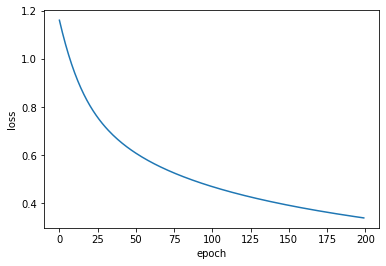

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

正解率を描画する

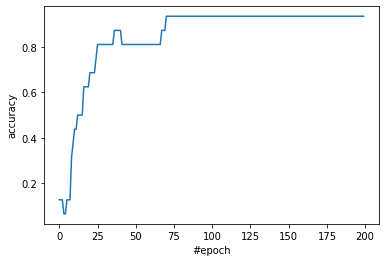

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_acc))),epoch_acc )
ax.set_xlabel('#epoch')
ax.set_ylabel('accuracy')
fig.show()

学習ループのC++コードを生成する

In [ ]:
CV.convert_train_code( project, folder, json_path, sol="cse1", epoch=200 )

[JSON] ./network/cse1.json
epoch_num :  200
batch_size :  32
lr :  0.01
inp  shape :  0 
pred shape :  0 
target shape :  0 
div :  False
cse_no :  7 8
batch_size: 32
inp_shape: 
[TRAIN]  ./cse/cse1_train.cpp


学習用C++コードをコンパイル、リンクする

In [ ]:
!g++ -std=c++14 ./cse/cse1.cpp ./cse/cse1_param.cpp ./cse/cse1_train.cpp -D_NOTEBOOK -D_TRAIN -I ../../../xtensor -lcblas -o ./cse/cse1_train

In [ ]:
!./cse/cse1_train

epoch_num : 200
epoch 0 - loss 1.16101 - accuracy 0.125
epoch 1 - loss 1.13429 - accuracy 0.125
epoch 2 - loss 1.10873 - accuracy 0.125
epoch 3 - loss 1.0843 - accuracy 0.0625
epoch 4 - loss 1.06096 - accuracy 0.0625
epoch 5 - loss 1.0387 - accuracy 0.125
epoch 6 - loss 1.01746 - accuracy 0.125
epoch 7 - loss 0.997219 - accuracy 0.125
epoch 8 - loss 0.977925 - accuracy 0.3125
epoch 9 - loss 0.959542 - accuracy 0.375
epoch 10 - loss 0.942023 - accuracy 0.4375
epoch 11 - loss 0.925326 - accuracy 0.4375
epoch 12 - loss 0.909416 - accuracy 0.5
epoch 13 - loss 0.894252 - accuracy 0.5
epoch 14 - loss 0.879794 - accuracy 0.5
epoch 15 - loss 0.866004 - accuracy 0.5
epoch 16 - loss 0.852844 - accuracy 0.625
epoch 17 - loss 0.840278 - accuracy 0.625
epoch 18 - loss 0.828271 - accuracy 0.625
epoch 19 - loss 0.816794 - accuracy 0.625
epoch 20 - loss 0.805818 - accuracy 0.6875
epoch 21 - loss 0.795309 - accuracy 0.6875
epoch 22 - loss 0.785238 - accuracy 0.6875
epoch 23 - loss 0.775579 - accuracy 0

In [ ]:
# read output file from c++ code
f = open('./cse/cse1.out', 'r')

loss = []
acc=[]

datalist = f.readlines()
for data in datalist:
  ds = data.split(',')
  loss.append( float(ds[0]) )
  acc.append( float(ds[1]) )

f.close()

print("epoch =", len(loss))
print( loss )

epoch = 200
[1.161011, 1.134289, 1.108726, 1.084295, 1.060965, 1.0387, 1.017464, 0.997219, 0.977925, 0.959542, 0.942023, 0.925326, 0.909416, 0.894252, 0.879794, 0.866004, 0.852844, 0.840278, 0.828271, 0.816794, 0.805818, 0.795309, 0.785238, 0.775579, 0.766307, 0.757399, 0.748835, 0.740593, 0.732654, 0.725002, 0.717619, 0.71049, 0.7036, 0.696937, 0.690488, 0.684241, 0.678186, 0.672311, 0.666605, 0.661062, 0.655674, 0.650437, 0.64534, 0.640376, 0.635538, 0.630821, 0.626219, 0.621727, 0.61734, 0.613054, 0.608863, 0.604764, 0.600755, 0.59683, 0.592985, 0.589219, 0.585527, 0.581908, 0.578357, 0.574874, 0.571454, 0.568096, 0.564798, 0.561558, 0.558374, 0.555243, 0.552165, 0.549137, 0.546158, 0.543226, 0.540339, 0.537497, 0.534698, 0.531941, 0.529225, 0.526547, 0.523909, 0.521307, 0.518741, 0.516211, 0.513715, 0.511252, 0.508822, 0.506423, 0.504055, 0.501718, 0.499409, 0.49713, 0.494878, 0.492654, 0.490456, 0.488284, 0.486138, 0.484017, 0.481921, 0.479851, 0.477805, 0.475782, 0.473781, 0.4718

収束状況グラフを描画する

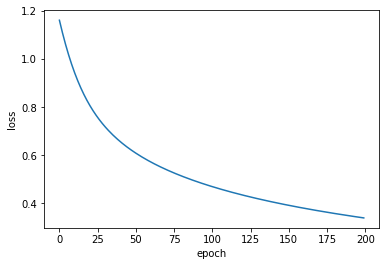

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(loss))), loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

正解率を描画する

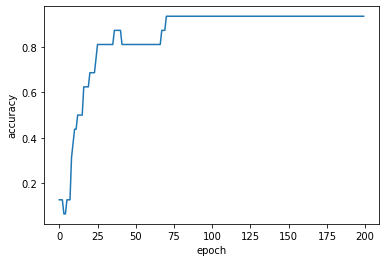

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))), acc)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig.show()